<a href="https://colab.research.google.com/github/LeonardoCechellaVelho/machine-learning/blob/master/knn_svm_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns #biblioteca utilizada para construir os gráficos
from sklearn.linear_model import LogisticRegression # biblioteca para regressão logística 
from sklearn.decomposition import PCA #biblioteca para PCA
from sklearn.feature_selection import RFE #biblioteca para aplicação RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression #importa o modelo de regressão linear univariada
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
data_frame = pd.read_csv('insurance.csv')

In [ ]:
data_frame['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1321 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
data_frame.describe()

,age,bmi,children,charges
count,1321.000000,1338.000000,1338.000000,1338.000000
mean,39.248297,30.663397,1.094918,13270.422265
std,14.017591,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data_frame.isnull().sum()

age         17
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

In [ ]:
mean_age = data_frame['age'].mean()

In [ ]:
data_frame['age'].fillna(mean_age,inplace=True)

In [ ]:
data_frame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data_frame.groupby(['region']).mean()

,age,bmi,children,charges
region,,,,
northeast,39.330226,29.173503,1.046296,13406.384516
northwest,39.210759,29.199785,1.147692,12417.575374
southeast,38.999280,33.355989,1.049451,14735.411438
southwest,39.483056,30.596615,1.141538,12346.937377


In [ ]:
label_encoder_region = LabelEncoder()
data_frame['region_encoded'] = label_encoder_region.fit_transform(data_frame['region'])

In [ ]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges,region_encoded
0,19.0,female,27.900,0,yes,southwest,16884.92400,3
1,18.0,male,33.770,1,no,southeast,1725.55230,2
2,28.0,male,33.000,3,no,southeast,4449.46200,2
3,33.0,male,22.705,0,no,northwest,21984.47061,1
4,32.0,male,28.880,0,no,northwest,3866.85520,1


In [ ]:
one_hot_smoker = pd.get_dummies(data_frame['smoker'])
data_frame =  data_frame.join(one_hot_smoker)

In [ ]:
one_hot_sex = pd.get_dummies(data_frame['sex'])
data_frame =  data_frame.join(one_hot_sex)

In [ ]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges,region_encoded,no,yes,female,male
0,19.0,female,27.900,0,yes,southwest,16884.92400,3,0,1,1,0
1,18.0,male,33.770,1,no,southeast,1725.55230,2,1,0,0,1
2,28.0,male,33.000,3,no,southeast,4449.46200,2,1,0,0,1
3,33.0,male,22.705,0,no,northwest,21984.47061,1,1,0,0,1
4,32.0,male,28.880,0,no,northwest,3866.85520,1,1,0,0,1


In [ ]:
data_frame.corr()

,age,bmi,children,charges,region_encoded,no,yes,female,male
age,1.000000,0.108501,0.040725,0.297853,0.001721,0.021289,-0.021289,0.020599,-0.020599
bmi,0.108501,1.000000,0.012759,0.198341,0.157566,-0.003750,0.003750,-0.046371,0.046371
children,0.040725,0.012759,1.000000,0.067998,0.016569,-0.007673,0.007673,-0.017163,0.017163
charges,0.297853,0.198341,0.067998,1.000000,-0.006208,-0.787251,0.787251,-0.057292,0.057292
region_encoded,0.001721,0.157566,0.016569,-0.006208,1.000000,0.002181,-0.002181,-0.004588,0.004588
no,0.021289,-0.003750,-0.007673,-0.787251,0.002181,1.000000,-1.000000,0.076185,-0.076185
yes,-0.021289,0.003750,0.007673,0.787251,-0.002181,-1.000000,1.000000,-0.076185,0.076185
female,0.020599,-0.046371,-0.017163,-0.057292,-0.004588,0.076185,-0.076185,1.000000,-1.000000
male,-0.020599,0.046371,0.017163,0.057292,0.004588,-0.076185,0.076185,-1.000000,1.000000


In [ ]:
x = data_frame[['age','bmi','children','female','male','yes','no']]

In [ ]:
y = data_frame['charges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
model_KNN = KNeighborsRegressor()

In [ ]:
model_KNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
pred = model_KNN.predict(X_test)

In [ ]:
model_KNN.score(X_test,y_test)

0.8251401491733715

In [ ]:
n_k = 100

In [ ]:
list_R2 = [] 
list_knn = []

In [ ]:
for x in range(1,n_k):
  model_KNN = KNeighborsRegressor(n_neighbors=x)
  model_KNN.fit(X_train,y_train)
  R2 = model_KNN.score(X_test,y_test)
  print(' N_K: {} R2: {}'.format(x,R2))
  list_R2.append(R2)
  list_knn.append(x)


 N_K: 1 R2: 0.6912797029999795
 N_K: 2 R2: 0.7877683997819087
 N_K: 3 R2: 0.8168616318697094
 N_K: 4 R2: 0.8164475882660519
 N_K: 5 R2: 0.8251401491733715
 N_K: 6 R2: 0.8283832295619581
 N_K: 7 R2: 0.8300216613011289
 N_K: 8 R2: 0.8312762606896245
 N_K: 9 R2: 0.8360043488857609
 N_K: 10 R2: 0.8332317892466969
 N_K: 11 R2: 0.8348928027454133
 N_K: 12 R2: 0.8334081927738163
 N_K: 13 R2: 0.8282914787019979
 N_K: 14 R2: 0.8296440139356509
 N_K: 15 R2: 0.8289712640531995
 N_K: 16 R2: 0.8248280023429646
 N_K: 17 R2: 0.8230499719055916
 N_K: 18 R2: 0.8224016281330755
 N_K: 19 R2: 0.8188355740171307
 N_K: 20 R2: 0.8182787642366217
 N_K: 21 R2: 0.8167108782905003
 N_K: 22 R2: 0.8157791234845082
 N_K: 23 R2: 0.8132889049626398
 N_K: 24 R2: 0.8124773558232481
 N_K: 25 R2: 0.8090475407200597
 N_K: 26 R2: 0.8063872616203115
 N_K: 27 R2: 0.8041677670368266
 N_K: 28 R2: 0.8017274771167923
 N_K: 29 R2: 0.8018204409345184
 N_K: 30 R2: 0.8010299599663142
 N_K: 31 R2: 0.8004439702356305
 N_K: 32 R2: 0.79

In [ ]:
len(list_R2)

99

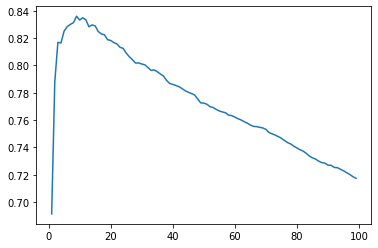

In [ ]:
sns.lineplot(x=range(1,n_k), y=list_R2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
pred_tree = tree_regressor.predict(X_test)

In [ ]:
r2_score(y_test,pred_tree)

0.7531085320348044

In [ ]:
from sklearn import tree

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image  

[Text(118.65965000465357, 212.49818181818182, 'X[6] <= 0.5\nmse = 146468393.299\nsamples = 936\nvalue = 13379.157'),
 Text(32.138934664067975, 202.61454545454546, 'X[1] <= 0.377\nmse = 134977942.179\nsamples = 195\nvalue = 31757.029'),
 Text(15.126603560791873, 192.73090909090908, 'X[0] <= 0.5\nmse = 24643421.678\nsamples = 95\nvalue = 21261.647'),
 Text(6.75229611948143, 182.84727272727272, 'X[1] <= 0.222\nmse = 10661679.718\nsamples = 57\nvalue = 18537.663'),
 Text(3.5388227049754732, 172.96363636363637, 'X[1] <= 0.155\nmse = 3850101.471\nsamples = 19\nvalue = 16329.112'),
 Text(2.1897687456201824, 163.07999999999998, 'X[2] <= 0.8\nmse = 3117275.129\nsamples = 9\nvalue = 15336.19'),
 Text(1.8769446391030136, 153.19636363636363, 'X[0] <= 0.448\nmse = 1595210.381\nsamples = 8\nvalue = 14875.307'),
 Text(1.5641205325858445, 143.31272727272727, 'X[0] <= 0.185\nmse = 1139749.262\nsamples = 7\nvalue = 15167.571'),
 Text(0.9384723195515068, 133.42909090909092, 'X[1] <= 0.154\nmse = 76350.74

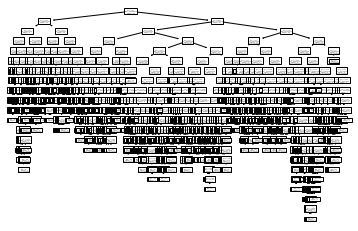

In [ ]:
tree.plot_tree(tree_regressor)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.461956 to fit



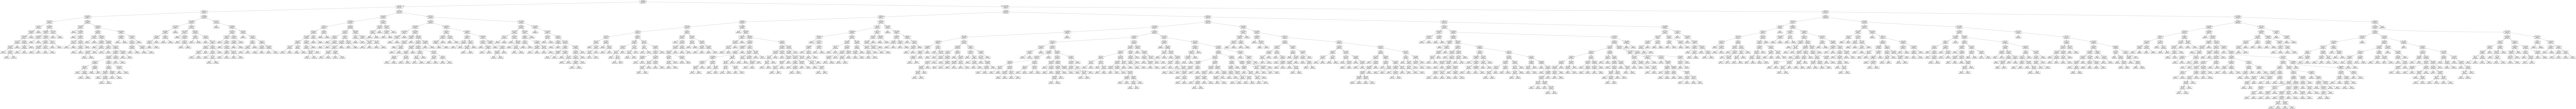

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(tree_regressor, out_file=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
from sklearn.svm import SVR

In [ ]:
modelSvr = SVR(kernel='rbf',C=10000)

In [ ]:
modelSvr.fit(X_train, y_train)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predSvr = modelSvr.predict(X_test)

In [ ]:
r2_score(y_test, predSvr)

0.8498505883347929

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
data_frame_h = pd.read_csv('heart.csv')

In [ ]:
data_frame_h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data_frame_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data_frame_h.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data_frame_h.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data_frame_h.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
x = data_frame_h[['age','sex','thalach','exang','oldpeak']]

In [ ]:
y = data_frame_h['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NaiveBayes = GaussianNB()

In [ ]:
model_NaiveBayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred = model_NaiveBayes.predict(X_test)

In [ ]:
# Importando métricas para validação do modelo
from sklearn.metrics import  accuracy_score

In [ ]:
accuracy_score(y_test,pred)

0.8021978021978022

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_random = RandomForestClassifier(n_estimators=80, random_state=0)

In [ ]:
clf_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred_random = clf_random.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_random)

0.7692307692307693

In [ ]:
clf_random.n_estimators

80

In [ ]:
clf_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

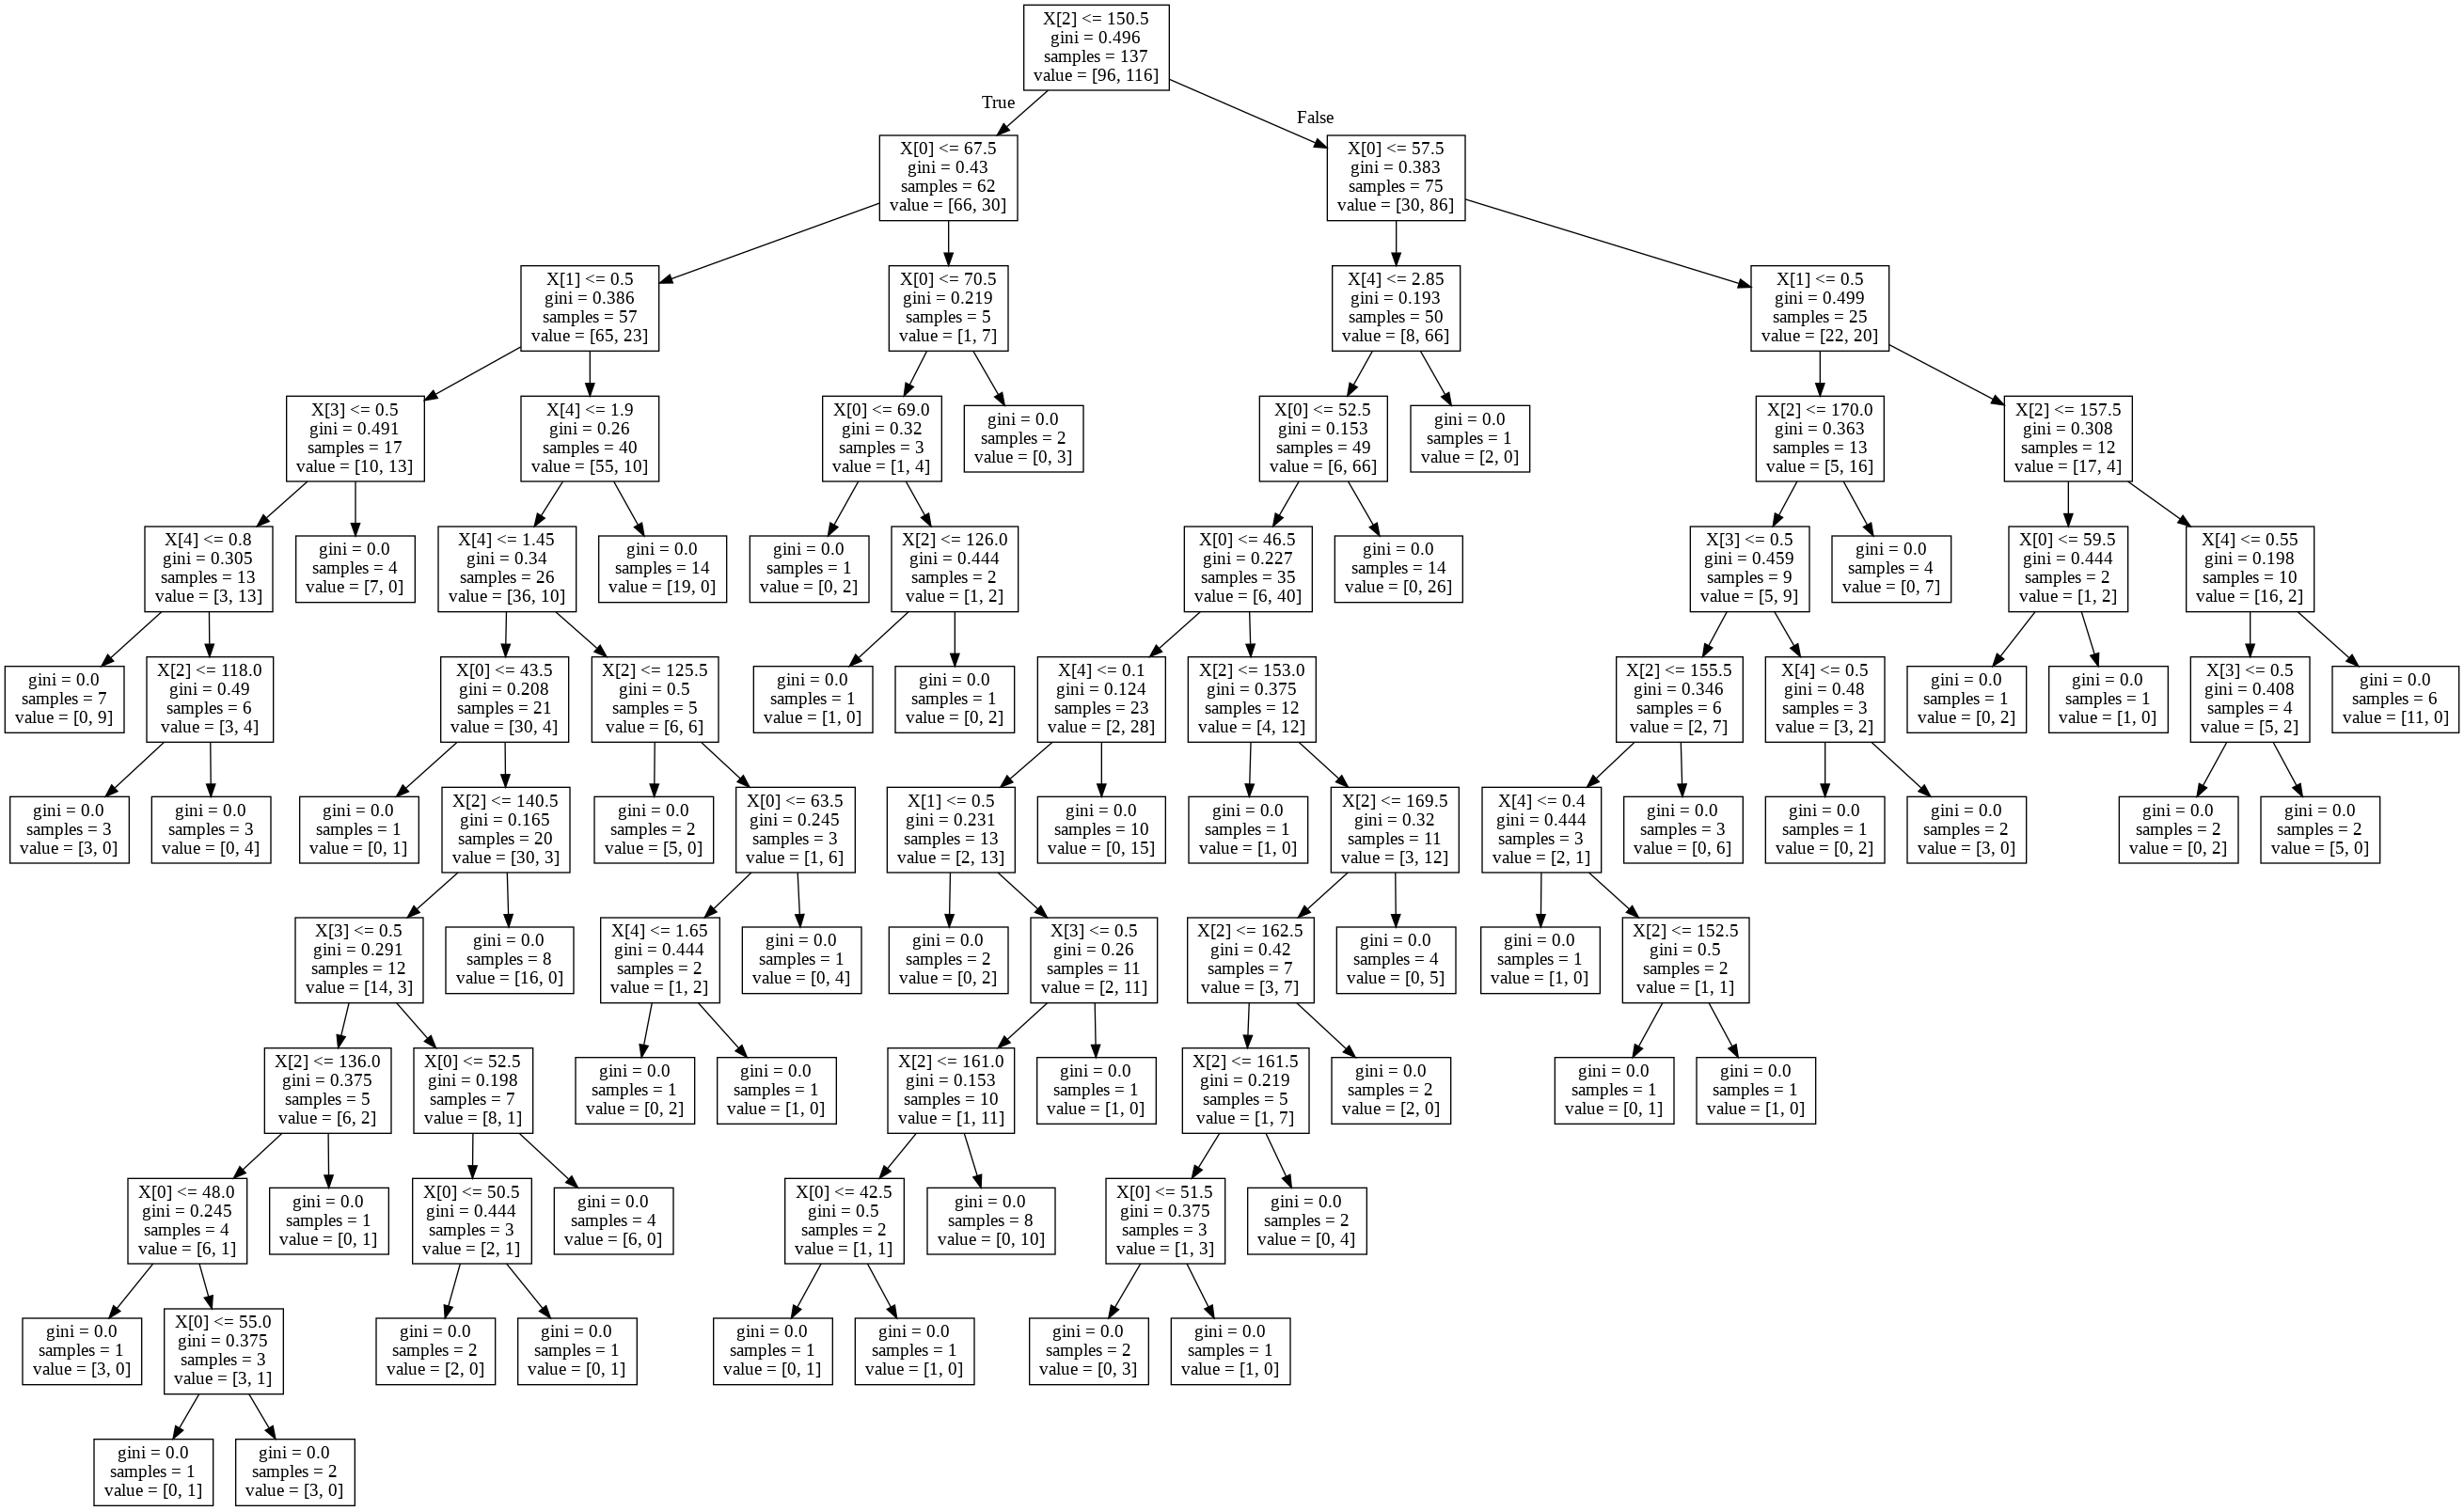

In [ ]:

dot_data = tree.export_graphviz(clf_random.estimators_[0], out_file=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
    

In [ ]:
from sklearn.svm import SVC

In [ ]:
modelSvc = SVC(C=1000, kernel='rbf')

In [ ]:
modelSvc.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predSvc = modelSvc.predict(X_test)

In [ ]:
accuracy_score(y_test, predSvc)

0.8131868131868132

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.90)

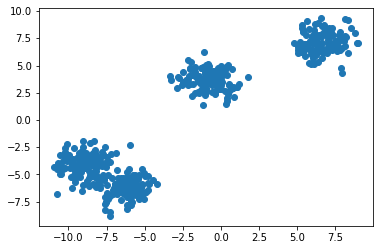

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wss = []

In [ ]:
for i in range(1, 20):
  k = KMeans(n_clusters=i)
  k.fit(X)
  print('n cluster: {} wss {}'.format(i, k.inertia_))
  wss.append(k.inertia_)

n cluster: 1 wss 33448.1787861714
n cluster: 2 wss 5826.9482391123765
n cluster: 3 wss 1632.9237152437536
n cluster: 4 wss 847.6951830746418
n cluster: 5 wss 760.625174235126
n cluster: 6 wss 674.4056645939643
n cluster: 7 wss 593.0137740266518
n cluster: 8 wss 520.2025965363805
n cluster: 9 wss 473.61616945039606
n cluster: 10 wss 436.658376107953
n cluster: 11 wss 393.5806421677021
n cluster: 12 wss 350.31103362914314
n cluster: 13 wss 333.8623026254006
n cluster: 14 wss 303.45831004596914
n cluster: 15 wss 283.64950647323747
n cluster: 16 wss 270.4055147805841
n cluster: 17 wss 253.6181909267051
n cluster: 18 wss 240.11976579020308
n cluster: 19 wss 227.63970924360592


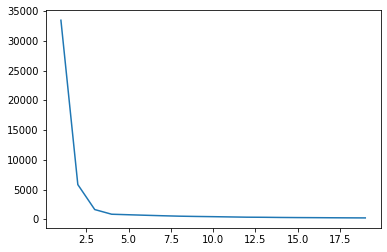

In [ ]:
plt.plot(range(1,20), wss)

In [ ]:
k = KMeans(n_clusters=3)

In [ ]:
k.fit_predict(X)

array([2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0,
       1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1,

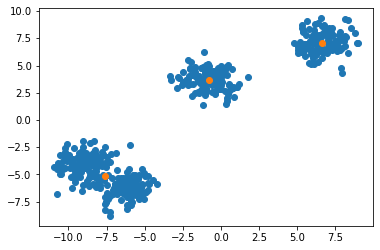

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1])